In [92]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [93]:
data = load_boston().data
target_data = load_boston().target

In [94]:
boston_data = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

In [95]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [96]:
boston_data.shape

(506, 13)

In [97]:
boston_data['PRICE'] = target_data

data = boston_data.drop('PRICE', axis = 1)
target = boston_data['PRICE']


In [98]:
# Data splitting

from sklearn.model_selection import train_test_split

# Splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(data, target_data, test_size=0.33)

In [99]:
# Data Standardization

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
# shape of test and train data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


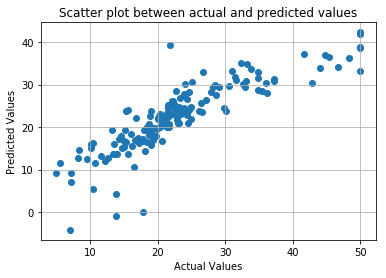

In [101]:
# SGD Classifier with sklearn implementation
# https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python

clf = SGDRegressor()
clf.fit(X_train, y_train)
plt.scatter(y_test, clf.predict(X_test))
plt.grid()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot between actual and predicted values')
plt.show()

In [102]:
# MSE and MAE of sklearn implementation

from sklearn.metrics import mean_absolute_error

print('Mean Squared Error after sklearn implementation :', mean_squared_error(y_test, clf.predict(X_test)))
print('Mean Absolute Error after sklearn implementation :', mean_absolute_error(y_test, clf.predict(X_test)))

Mean Squared Error after sklearn implementation : 23.191790394
Mean Absolute Error after sklearn implementation : 3.26583123241


In [103]:
# Weight of sklearn implementation

print('Weight after sklearn implementation :', clf.coef_)

Weight after sklearn implementation : [-0.52380409  0.32545145 -0.29677791  1.02042997 -0.75370784  2.65470476
  0.05639033 -2.07758715  0.77030698 -0.44860918 -1.85116231  0.75898351
 -3.88445001]


In [104]:
# Defining Custom SGD Classifier

# https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression
# https://www.kaggle.com/premvardhan/stocasticgradientdescent-implementation-lr-python

# SGD Regressor processor
def CustomSGD(train_data, learning_rate=0.001, n_itr=1000, k=10):
    
    current_weight =np.zeros(shape=(1,train_data.shape[1]-1))      # Initializing array for weight vector
    current_intercept = 0                                          # Initializing intercept
    current_itr = 1                                                # intilaizing Iteration
    
    while(current_itr <= n_itr):                                       # Loop for all the iteration which is 1000
        
        old_weight = current_weight
        old_intercept = current_intercept
        
        temp_weight = np.zeros(shape=(1,train_data.shape[1]-1))
        temp_intercept = 0
        
        temp = train_data.sample(k)                                # create k random points data Sample from train data where k = 10                          
        
        y = np.array(temp['price'])                                
        x = np.array(temp.drop('price',axis=1))                      
        
        for i in range(k):                                         # Loop through k random points
            
            temp_weight += x[i] * (y[i] - (np.dot(old_weight, x[i]) + old_intercept)) * (-2/k)  # Calculate (dl/dw = Summation of (-2x(i) * (y(i)-w(transpose)*x(i) - b)/ k
            temp_intercept += (y[i] - (np.dot(old_weight, x[i]) + old_intercept)) * (-2/k)      # Calculate (dl/db = Summation of (-2/k) (y(i) - w(transpose)*x(i) - b)
            
        current_weight = old_weight - learning_rate * temp_weight                               # Calculate w(next iteration) = w(previous iteration)-r(learning rate)(dl/dw) 
        current_intercept = old_intercept - learning_rate * temp_intercept                      # Calculate b(next iteration) = b(previous iteration)-r(learning rate)(dl/db)
        
        if(old_weight == current_weight).all():                       # if previous and current values are same finalize w and b                 
            
            break
        
        current_itr += 1          # If previous and current values are different loop it untill we get the same value
        
        
    return current_weight, current_intercept

def predict(x, w, b):
    
    y_pred=[]
    
    for i in range(len(x)):                 
        
        y = np.asscalar(np.dot(w, x[i]) + b)
        
        y_pred.append(y)
        
    return np.array(y_pred)


def plot(test_data, y_pred):
    
    #scatter plot
    plt.scatter(test_data, y_pred)
    plt.grid()
    plt.title('scatter plot between actual and predicted value')
    plt.xlabel('actual value')
    plt.ylabel('predicted value')
    plt.show()        
        

In [105]:
# Data splitting for custom SGD

from sklearn.model_selection import train_test_split

# Splitting in train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(data, target_data, test_size=0.33)

# Splitting in Train Test and Cross Validation
X1_train, X1_cv, y1_train, y1_cv = train_test_split(X1_train, y1_train, test_size=0.33)

In [106]:
# Data Standardization for custom SGD
X1_train = scaler.transform(X1_train)
X1_cv=scaler.transform(X1_cv)

X1_train=np.array(X1_train)
X1_train_data=pd.DataFrame(X1_train)
X1_train_data['price']=y1_train

X1_cv_data=pd.DataFrame(X1_cv)
X1_cv_data['price']=y1_cv

y1_train_=np.array(y1_train)
y1_cv=np.array(y1_cv)


In [107]:
def tuneParams_learning_rate():
    
    train_error = []
    cv_error = []
    r = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    
    for itr in r:
        
        w, b = CustomSGD(X1_train_data, learning_rate = itr, n_itr = 1000)
        y1_pred_train = predict(X1_train, w, b)
        train_error.append(mean_squared_error(y1_train, y1_pred_train))
        
        w, b = CustomSGD(X1_cv_data, learning_rate = itr, n_itr = 1000)
        y1_pred_cv = predict(X1_cv, w, b)
        cv_error.append(mean_squared_error(y1_cv, y1_pred_cv))
        
    return train_error,cv_error 

In [108]:
train_error,cv_error=tuneParams_learning_rate()

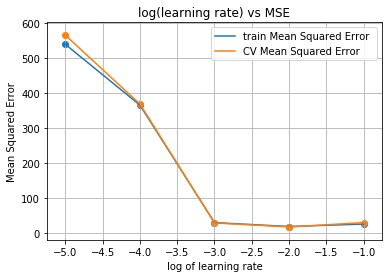

In [109]:
# plotting obtained values

import math
r = [0.00001,0.0001,0.001,0.01,0.1]

x1 = [math.log10(i) for i in r]

plt.plot(x1,train_error,label='train Mean Squared Error ')
plt.plot(x1,cv_error,label='CV Mean Squared Error')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

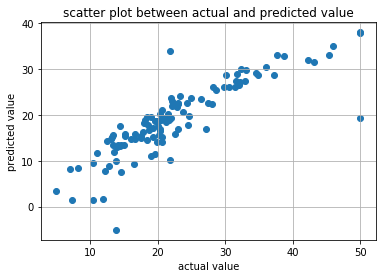

In [110]:
# running implemented SGD Classifier with obtained optimal learning rate

w,b = CustomSGD(X1_train_data,learning_rate=0.001,n_itr=1000)
y_pred=predict(X1_cv, w, b)
plot(y1_cv, y_pred)

In [111]:
# Errors in implemeted model

print('Mean Squared Error after sklearn implementation :', mean_squared_error(y1_cv,y_pred))
print('Mean Absolute Error after sklearn implementation :', mean_absolute_error(y1_cv,y_pred))

Mean Squared Error after sklearn implementation : 35.5011353896
Mean Absolute Error after sklearn implementation : 4.09106210882


In [112]:
# Weight of implemented model

print('Weight after custom implementation :', w)


Weight after custom implementation : [[-0.25636454  0.16867572 -0.02128325  0.57903203 -0.08315041  3.04927617
  -0.08005042 -0.86034177 -0.39381752 -1.01818641 -0.93491511  0.16190789
  -3.29345498]]


In [113]:
# Comparing MSE and MAE of custom and Sklearn models

from prettytable import PrettyTable

prettytable = PrettyTable()

prettytable.field_names=['SGD Implementation type', 'Mean Squared Error','Mean Absolute Error']

prettytable.add_row(['Custom', mean_squared_error(y1_cv,y_pred), mean_absolute_error(y1_cv,y_pred)])
prettytable.add_row(['Sklearn', mean_squared_error(y_test, clf.predict(X_test)), mean_absolute_error(y_test, clf.predict(X_test))])
    
print(prettytable)   

+-------------------------+--------------------+---------------------+
| SGD Implementation type | Mean Squared Error | Mean Absolute Error |
+-------------------------+--------------------+---------------------+
|          Custom         |   35.5011353896    |    4.09106210882    |
|         Sklearn         |    23.191790394    |    3.26583123241    |
+-------------------------+--------------------+---------------------+


In [114]:
# Comparing weight vector of custom and Sklearn models

from prettytable import PrettyTable

prettytable = PrettyTable()

prettytable.field_names=['SGD Implementation type', 'Weight Vector']

prettytable.add_row(['Custom', w])
prettytable.add_row(['Sklearn', clf.coef_])
    
print(prettytable)   

+-------------------------+---------------------------------------------------------------------------+
| SGD Implementation type |                               Weight Vector                               |
+-------------------------+---------------------------------------------------------------------------+
|          Custom         | [[-0.25636454  0.16867572 -0.02128325  0.57903203 -0.08315041  3.04927617 |
|                         |   -0.08005042 -0.86034177 -0.39381752 -1.01818641 -0.93491511  0.16190789 |
|                         |                                -3.29345498]]                              |
|         Sklearn         |  [-0.52380409  0.32545145 -0.29677791  1.02042997 -0.75370784  2.65470476 |
|                         |    0.05639033 -2.07758715  0.77030698 -0.44860918 -1.85116231  0.75898351 |
|                         |                                -3.88445001]                               |
+-------------------------+-------------------------------------